#------------------------Header Comment ----------------------#
#write general information about the script#
The script performs classfication using ANN or MLP
#the authors involved and copyright details, if any#
Author - Yash Gupta
#--------------------------------------------------------------#

In [1]:

# multi-class classification with Keras
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import model_from_json
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [19]:
# load dataset
trainx = pd.read_csv('norm_trainx.csv')
# trainx = trainx.drop(['Temperature (C)','Apparent Temperature (C)','Wind Bearing (degrees)'],axis=1)
trainx = trainx.drop('Unnamed: 0',axis=1);
trainy = pd.read_csv('trainy.csv')
trainy = trainy.drop('Unnamed: 0',axis=1);


testx = pd.read_csv('norm_testx.csv')
testx = testx.drop('Unnamed: 0',axis=1);
testy = pd.read_csv('testy.csv')
testy = testy.drop('Unnamed: 0',axis=1);

X = np.array(trainx);
Y = np.array(trainy['summary'])
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [29]:
import tensorflow
tensorflow.random.set_seed(1999)
t0 = time.time()

# initializing model and training it
model = Sequential()
model.add(Dense(10, input_dim=7, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X,dummy_y,validation_split=0.33,batch_size=3000, epochs = 100)
t1 = time.time()
total = t1-t0
print(total)
results = model.predict(testx)
ypred = tf.keras.backend.argmax(results).numpy()
ypred

Train on 35744 samples, validate on 17606 samples
Epoch 1/100
35744/35744 [==============================] - 0s 6us/step - loss: 1.4802 - accuracy: 0.3471 - val_loss: 1.4170 - val_accuracy: 0.3669
Epoch 2/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.3842 - accuracy: 0.3580 - val_loss: 1.3263 - val_accuracy: 0.3589
Epoch 3/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.2977 - accuracy: 0.3775 - val_loss: 1.2584 - val_accuracy: 0.4089
Epoch 4/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.2430 - accuracy: 0.4489 - val_loss: 1.2143 - val_accuracy: 0.4654
Epoch 5/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.2000 - accuracy: 0.4671 - val_loss: 1.1660 - val_accuracy: 0.4814
Epoch 6/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.1668 - accuracy: 0.4815 - val_loss: 1.1418 - val_accuracy: 0.4909
Epoch 7/100
35744/35744 [==============================] - 0s 2us/st

35744/35744 [==============================] - 0s 2us/step - loss: 1.0661 - accuracy: 0.5093 - val_loss: 1.0553 - val_accuracy: 0.5167
Epoch 57/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.0644 - accuracy: 0.5097 - val_loss: 1.0541 - val_accuracy: 0.5178
Epoch 58/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.0638 - accuracy: 0.5097 - val_loss: 1.0565 - val_accuracy: 0.5161
Epoch 59/100
35744/35744 [==============================] - ETA: 0s - loss: 1.0654 - accuracy: 0.50 - 0s 3us/step - loss: 1.0646 - accuracy: 0.5109 - val_loss: 1.0650 - val_accuracy: 0.5147
Epoch 60/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.0660 - accuracy: 0.5095 - val_loss: 1.0551 - val_accuracy: 0.5156
Epoch 61/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.0631 - accuracy: 0.5103 - val_loss: 1.0557 - val_accuracy: 0.5165
Epoch 62/100
35744/35744 [==============================] - 0s 2us/step - loss: 1.0

array([2, 4, 1, ..., 0, 0, 1], dtype=int64)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


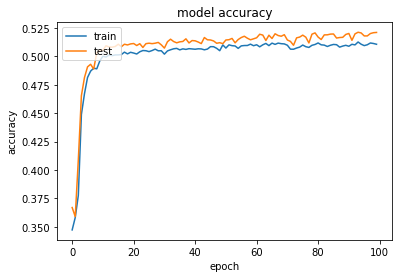

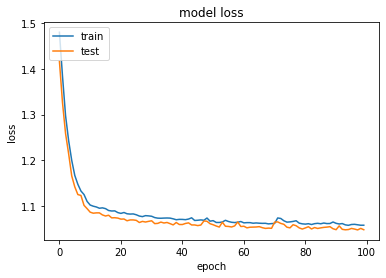

In [30]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
total

8.647835969924927

In [8]:
# do not save again
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("Annmodel.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
lmodel = model_from_json(loaded_model_json)
# load weights into new model
lmodel.load_weights("Annmodel.h5")
print("Loaded model from disk")
lmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Loaded model from disk


In [43]:
def ANN(X):
    tX = np.array(X);
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lmodel = model_from_json(loaded_model_json)
    lmodel.load_weights("Annmodel.h5")
    lmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    results = lmodel.predict(tX)
    predresults = tf.keras.backend.argmax(results).numpy()
    data = pd.DataFrame(data=predresults, columns=["pred_labels"])
    
    label_map = {
    0:'Partly Cloudy',
    1:'Mostly Cloudy',
    2:'Overcast',
    3:'Clear',
    4:'Foggy',
    }
    data['pred_labels'] = data['pred_labels'].map(label_map)
    return data